In [1]:
from pyspark import SparkContext
from pyspark import SQLContext
sc = SparkContext()
sqlContext = SQLContext(sc)
from pyspark.sql import SparkSession
sparkSession = SparkSession.builder.getOrCreate()

from pyspark.sql.functions import col, countDistinct
from pyspark.sql.functions import isnan, when, count, col


import matplotlib as plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
b, g, r, p = sns.color_palette("muted", 4)

<b>Explore file #1 stores.csv</b>

In [3]:
sdfStores = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/stores.csv",header = True,inferSchema = True)

In [4]:
sdfStores.count()

54

In [5]:
# Added on 06/15/2018 - Yagna
# Data Description
sdfStores.describe()

DataFrame[summary: string, store_nbr: string, city: string, state: string, type: string, cluster: string]

In [6]:
# Added on 06/15/2018 - Yagna
# Sample 10 records
sdfStores.show(10)

+---------+-------------+--------------------+----+-------+
|store_nbr|         city|               state|type|cluster|
+---------+-------------+--------------------+----+-------+
|        1|        Quito|           Pichincha|   D|     13|
|        2|        Quito|           Pichincha|   D|     13|
|        3|        Quito|           Pichincha|   D|      8|
|        4|        Quito|           Pichincha|   D|      9|
|        5|Santo Domingo|Santo Domingo de ...|   D|      4|
|        6|        Quito|           Pichincha|   D|     13|
|        7|        Quito|           Pichincha|   D|      8|
|        8|        Quito|           Pichincha|   D|      8|
|        9|        Quito|           Pichincha|   B|      6|
|       10|        Quito|           Pichincha|   C|     15|
+---------+-------------+--------------------+----+-------+
only showing top 10 rows



In [7]:
sdfStores.count()

54

In [8]:
sdfStores.agg(countDistinct(col("store_nbr")).alias("count")).show()
# store_nbr is the primary key as distinct count and total row count match

+-----+
|count|
+-----+
|   54|
+-----+



In [9]:
sdfStores.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfStores.columns]).show()

+---------+----+-----+----+-------+
|store_nbr|city|state|type|cluster|
+---------+----+-----+----+-------+
|        0|   0|    0|   0|      0|
+---------+----+-----+----+-------+



In [10]:
sdfStores.select("city").distinct().count()

22

In [11]:
sdfStores.select("city").distinct().show(5)

+-------------+
|         city|
+-------------+
|      Quevedo|
|       Cuenca|
|     Guaranda|
|Santo Domingo|
|       Playas|
+-------------+
only showing top 5 rows



In [12]:
sdfStores.select("state").distinct().count()

16

In [13]:
sdfStores.select("state").distinct().show(5)

+----------+
|     state|
+----------+
|    Manabi|
|  Cotopaxi|
| Pichincha|
|Chimborazo|
|    Guayas|
+----------+
only showing top 5 rows



In [14]:
sdfStores.select("type").distinct().count()

5

In [15]:
sdfStores.select("type").distinct().show(10)

+----+
|type|
+----+
|   E|
|   B|
|   D|
|   C|
|   A|
+----+



In [16]:
sdfStores.select("cluster").distinct().count()

17

In [17]:
sdfStores.select("cluster").distinct().show(5)

+-------+
|cluster|
+-------+
|     12|
|      1|
|     13|
|      6|
|     16|
+-------+
only showing top 5 rows



/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


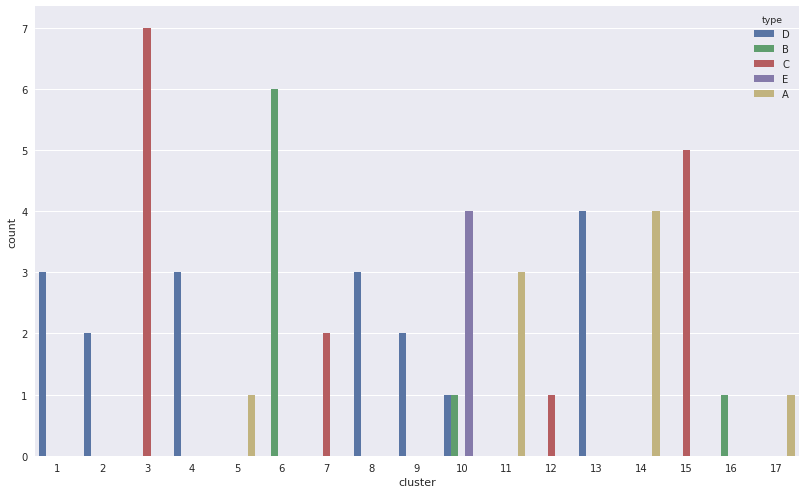

In [18]:
# Visual Data Analysis
StoresDF = sdfStores.toPandas()
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.countplot(x="cluster",hue="type",data=StoresDF)

/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


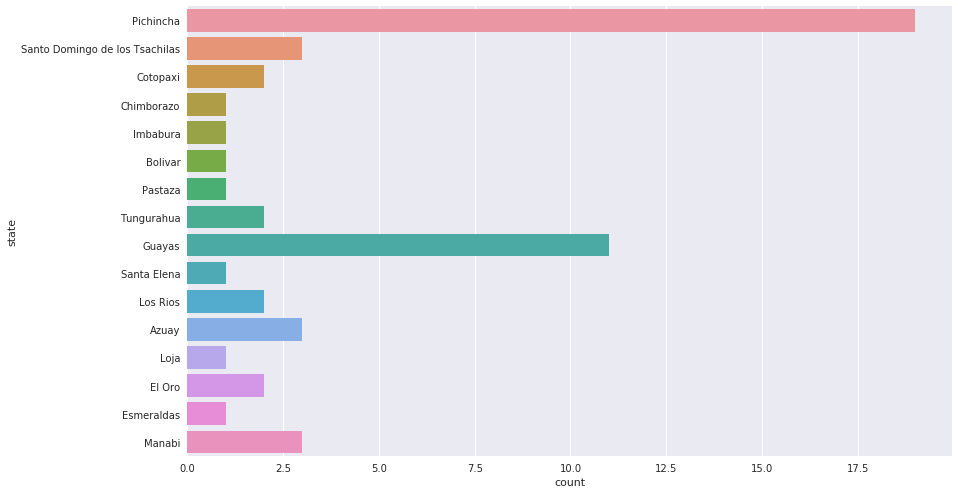

In [19]:
sns.countplot(y="state",data=StoresDF)

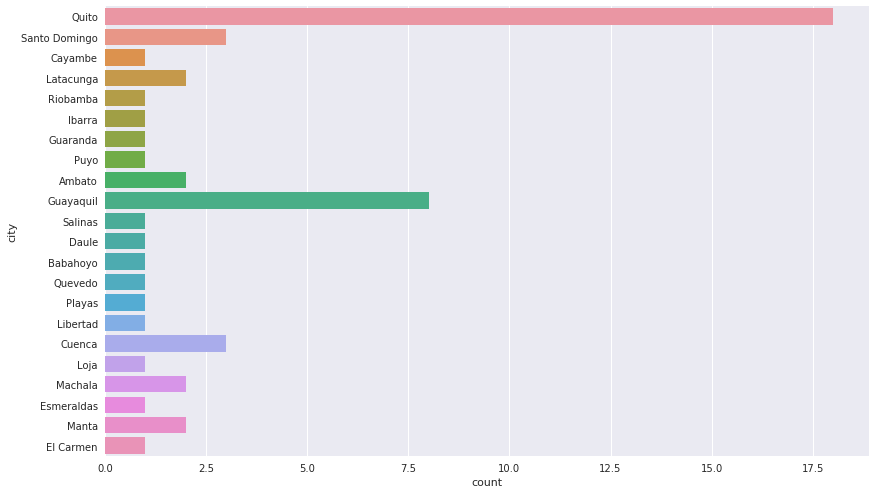

In [20]:
sns.countplot(y="city",data=StoresDF)

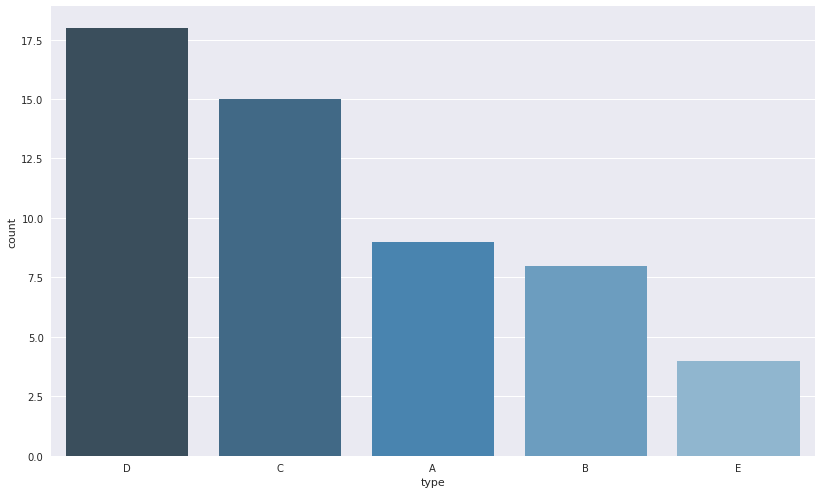

In [21]:
sns.countplot(x="type",data=StoresDF,order = StoresDF['type'].value_counts().index,palette="Blues_d")

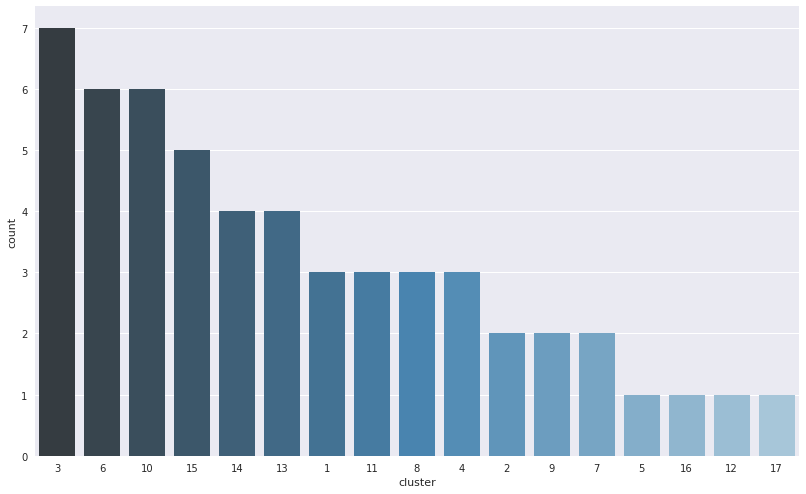

In [22]:
sns.countplot(x="cluster",data=StoresDF,order = StoresDF['cluster'].value_counts().index,palette="Blues_d")

<b>Explore file #2 oil.csv</b>

In [23]:
sdfOil = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/oil.csv",header = True,inferSchema = True)

In [24]:
sdfOil.count()

1218

In [25]:
sdfOil.show(10)

+-------------------+----------+
|               date|dcoilwtico|
+-------------------+----------+
|2013-01-01 00:00:00|      null|
|2013-01-02 00:00:00|     93.14|
|2013-01-03 00:00:00|     92.97|
|2013-01-04 00:00:00|     93.12|
|2013-01-07 00:00:00|      93.2|
|2013-01-08 00:00:00|     93.21|
|2013-01-09 00:00:00|     93.08|
|2013-01-10 00:00:00|     93.81|
|2013-01-11 00:00:00|      93.6|
|2013-01-14 00:00:00|     94.27|
+-------------------+----------+
only showing top 10 rows



In [26]:
sdfOil.agg(countDistinct(col("date")).alias("count")).show()
# date is the primary key as distinct count and total row count match

+-----+
|count|
+-----+
| 1218|
+-----+



In [27]:
sdfOil.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfOil.columns]).show()

+----+----------+
|date|dcoilwtico|
+----+----------+
|   0|        43|
+----+----------+



In [28]:
sdfOil.describe().show()

+-------+------------------+
|summary|        dcoilwtico|
+-------+------------------+
|  count|              1175|
|   mean| 67.71436595744689|
| stddev|25.630475729453117|
|    min|             26.19|
|    max|            110.62|
+-------+------------------+



In [29]:
sdfOil.approxQuantile("dcoilwtico", [0.5], 0.25)
#median

[46.41]

In [30]:
row1 = sdfOil.agg({"date": "max"}).collect()[0]
print row1["max(date)"]

2017-08-31 00:00:00


In [31]:
row2 = sdfOil.agg({"date": "min"}).collect()[0]
print row2["min(date)"]

2013-01-01 00:00:00


In [32]:
# Timeseries Analysis

In [33]:
sdfOilDF = sdfOil.toPandas()

In [34]:
sdfOilDF['date'] = pd.to_datetime(sdfOilDF['date'])

In [35]:
sdfOilDF.index = sdfOilDF['date']
del sdfOilDF['date']

In [36]:
# what is the mean oil price per month starting 2013/01/31 to 2017/08/31
sdfOilDF.resample('M').mean()

,dcoilwtico
date,
2013-01-31,94.756667
2013-02-28,95.308947
2013-03-31,92.938500
2013-04-30,92.021364
2013-05-31,94.509545
2013-06-30,95.772500
2013-07-31,104.670909
2013-08-31,106.572727
2013-09-30,106.289500


In [37]:
# what is the mean oil price per year starting 2013/01/31 to 2017/08/31
sdfOilDF.resample('Y').mean()

,dcoilwtico
date,
2013-12-31,97.982540
2014-12-31,93.172222
2015-12-31,48.656706
2016-12-31,43.293651
2017-12-31,49.232874


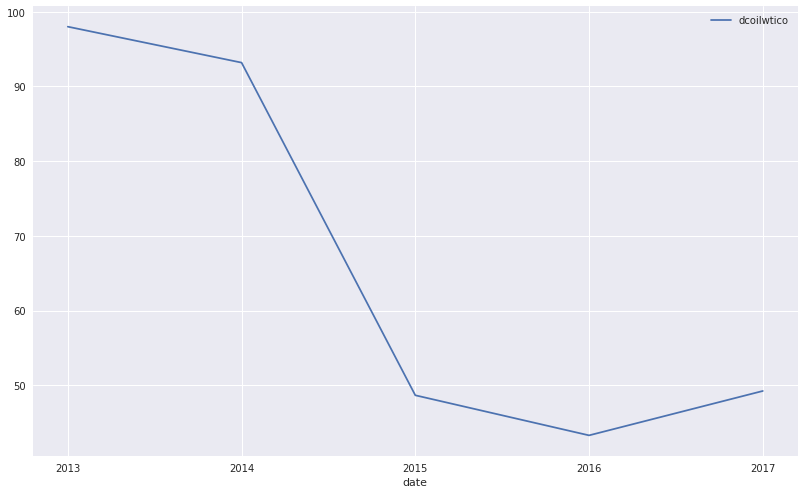

In [38]:
sdfOilDF.resample('Y').mean().plot()

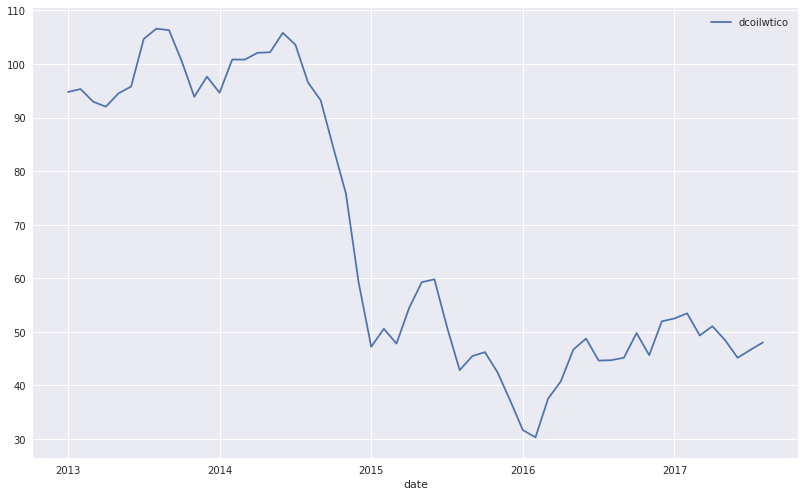

In [39]:
sdfOilDF.resample('M').mean().plot()

<b>Explore file #3 holidays_events.csv</b>

In [40]:
sdfHolidayEvents = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/holidays_events.csv",header = True,inferSchema = True)

In [41]:
sdfHolidayEvents.describe()

DataFrame[summary: string, type: string, locale: string, locale_name: string, description: string]

In [42]:
sdfHolidayEvents.show(10)

+-------------------+-------+--------+-----------+--------------------+-----------+
|               date|   type|  locale|locale_name|         description|transferred|
+-------------------+-------+--------+-----------+--------------------+-----------+
|2012-03-02 00:00:00|Holiday|   Local|      Manta|  Fundacion de Manta|      false|
|2012-04-01 00:00:00|Holiday|Regional|   Cotopaxi|Provincializacion...|      false|
|2012-04-12 00:00:00|Holiday|   Local|     Cuenca| Fundacion de Cuenca|      false|
|2012-04-14 00:00:00|Holiday|   Local|   Libertad|Cantonizacion de ...|      false|
|2012-04-21 00:00:00|Holiday|   Local|   Riobamba|Cantonizacion de ...|      false|
|2012-05-12 00:00:00|Holiday|   Local|       Puyo|Cantonizacion del...|      false|
|2012-06-23 00:00:00|Holiday|   Local|   Guaranda|Cantonizacion de ...|      false|
|2012-06-25 00:00:00|Holiday|Regional|   Imbabura|Provincializacion...|      false|
|2012-06-25 00:00:00|Holiday|   Local|  Latacunga|Cantonizacion de ...|     

In [43]:
sdfHolidayEvents.count()

350

In [44]:
sdfHolidayEvents.agg(countDistinct(col("date")).alias("count")).show()

+-----+
|count|
+-----+
|  312|
+-----+



In [45]:
sdfHolidayEvents.select("date").distinct().count()

312

In [46]:
sdfHolidayEvents.select("type").distinct().show()

+----------+
|      type|
+----------+
|     Event|
|   Holiday|
|  Transfer|
|    Bridge|
|Additional|
|  Work Day|
+----------+



In [47]:
sdfHolidayEvents.select("locale").distinct().show()

+--------+
|  locale|
+--------+
|National|
|   Local|
|Regional|
+--------+



In [48]:
sdfHolidayEvents.select("locale_name").distinct().count()

24

In [49]:
sdfHolidayEvents.select("date", "type", "locale_name").distinct().count()

349

In [50]:
sdfHolidayEvents.select("date", "type", "locale", "locale_name", "description", "transferred").distinct().count()
# All columns together form the PK

350

In [51]:
sdfHolidayEvents.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfHolidayEvents.columns]).show()

+----+----+------+-----------+-----------+-----------+
|date|type|locale|locale_name|description|transferred|
+----+----+------+-----------+-----------+-----------+
|   0|   0|     0|          0|          0|          0|
+----+----+------+-----------+-----------+-----------+



In [52]:
sdfHolidayEvents.select("date").distinct().count()

312

In [53]:
sdfHolidayEvents.select("date").distinct().show(5)

+-------------------+
|               date|
+-------------------+
|2016-12-24 00:00:00|
|2015-09-28 00:00:00|
|2012-05-12 00:00:00|
|2013-02-12 00:00:00|
|2013-10-11 00:00:00|
+-------------------+
only showing top 5 rows



In [54]:
sdfHolidayEvents.select("type").distinct().count()

6

In [55]:
sdfHolidayEvents.select("type").distinct().show(10)

+----------+
|      type|
+----------+
|     Event|
|   Holiday|
|  Transfer|
|    Bridge|
|Additional|
|  Work Day|
+----------+



In [56]:
sdfHolidayEvents.select("locale").distinct().count()

3

In [57]:
sdfHolidayEvents.select("locale").distinct().show(5)

+--------+
|  locale|
+--------+
|National|
|   Local|
|Regional|
+--------+



In [58]:
sdfHolidayEvents.select("locale_name").distinct().count()

24

In [59]:
sdfHolidayEvents.select("locale_name").distinct().show(5)

+-------------+
|  locale_name|
+-------------+
|      Quevedo|
|       Cuenca|
|     Cotopaxi|
|     Guaranda|
|Santo Domingo|
+-------------+
only showing top 5 rows



In [60]:
sdfHolidayEvents.select("description").distinct().count()

103

In [61]:
sdfHolidayEvents.select("description").distinct().show(5)

+--------------------+
|         description|
+--------------------+
| Terremoto Manabi+11|
|Independencia de ...|
| Terremoto Manabi+25|
|Fundacion de Esme...|
|        Black Friday|
+--------------------+
only showing top 5 rows



In [62]:
sdfHolidayEvents.select("transferred").distinct().count()

2

In [63]:
sdfHolidayEvents.select("transferred").distinct().show(5)

+-----------+
|transferred|
+-----------+
|       true|
|      false|
+-----------+



In [64]:
# Visual Data Analysis
sdfHolidayEventsDF = sdfHolidayEvents.toPandas()

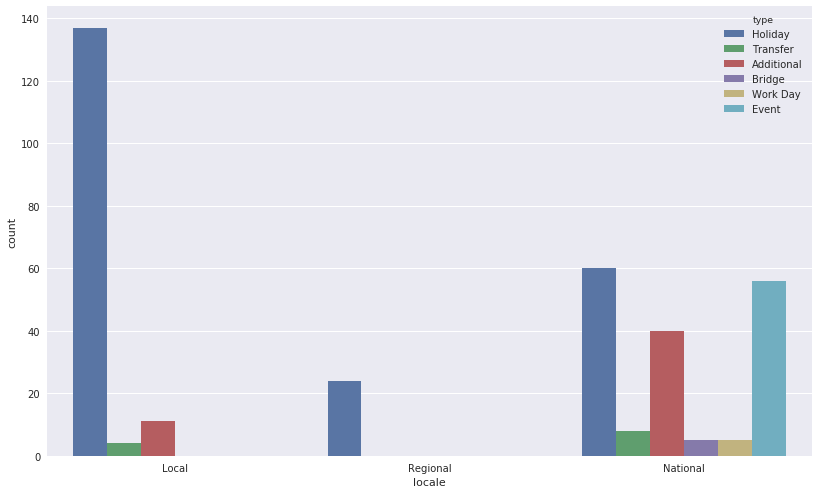

In [65]:
sns.countplot(x="locale",hue="type",data=sdfHolidayEventsDF)

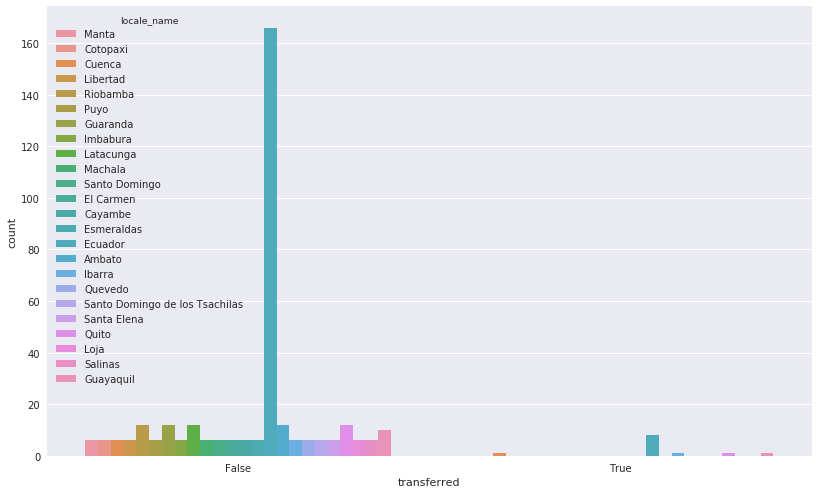

In [66]:
sns.countplot(x="transferred",hue="locale_name",data=sdfHolidayEventsDF)

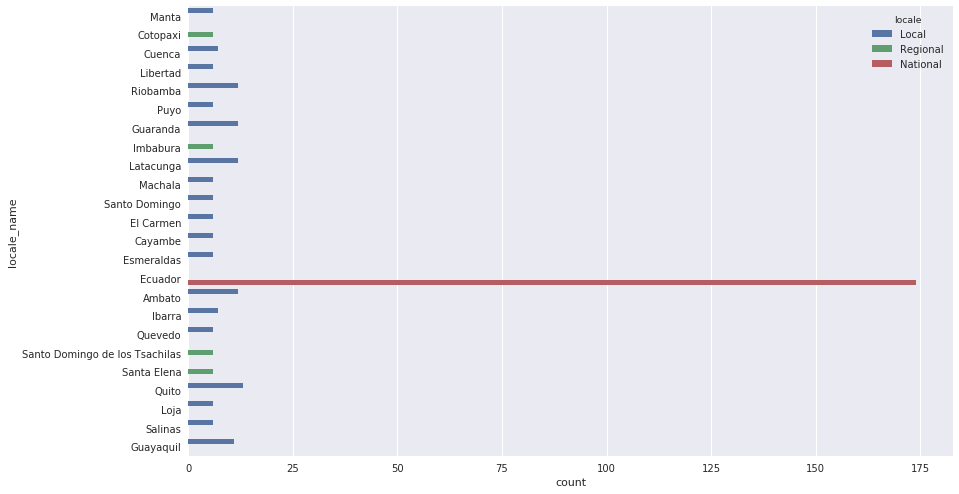

In [67]:
sns.countplot(y="locale_name",hue="locale",data=sdfHolidayEventsDF)

In [68]:
sdfHolidayEventsDF['date'] = pd.to_datetime(sdfHolidayEventsDF['date'])

In [69]:
sdfHolidayEventsDF.index = sdfHolidayEventsDF['date']
del sdfHolidayEventsDF['date']

/usr/local/anaconda/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


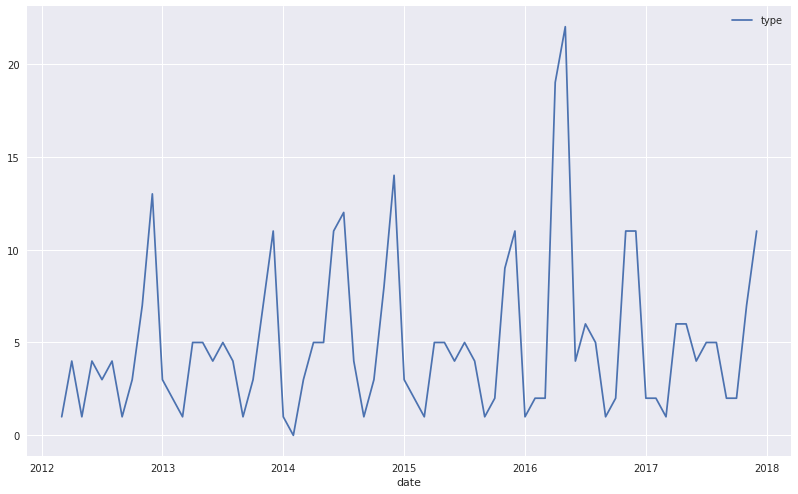

In [70]:
sdfHolidayEventsDF.resample('M',how={'type':'count'}).plot()

<b>Explore file #4 items.csv</b>

In [71]:
sdfItems = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/items.csv",header = True,inferSchema = True)

In [72]:
sdfItems.show(10)

+--------+------------+-----+----------+
|item_nbr|      family|class|perishable|
+--------+------------+-----+----------+
|   96995|   GROCERY I| 1093|         0|
|   99197|   GROCERY I| 1067|         0|
|  103501|    CLEANING| 3008|         0|
|  103520|   GROCERY I| 1028|         0|
|  103665|BREAD/BAKERY| 2712|         1|
|  105574|   GROCERY I| 1045|         0|
|  105575|   GROCERY I| 1045|         0|
|  105576|   GROCERY I| 1045|         0|
|  105577|   GROCERY I| 1045|         0|
|  105693|   GROCERY I| 1034|         0|
+--------+------------+-----+----------+
only showing top 10 rows



In [73]:
sdfItems.count()

4100

In [74]:
sdfItems.select("item_nbr").distinct().count()
# item_nbr is the primary key as distinct count and total row count match

4100

In [75]:
sdfItems.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfItems.columns]).show()

+--------+------+-----+----------+
|item_nbr|family|class|perishable|
+--------+------+-----+----------+
|       0|     0|    0|         0|
+--------+------+-----+----------+



In [76]:
sdfItems.select("item_nbr").distinct().count()

4100

In [77]:
sdfItems.select("item_nbr").distinct().show(5)

+--------+
|item_nbr|
+--------+
|  454593|
|  459762|
|  692531|
|  699703|
|  759651|
+--------+
only showing top 5 rows



In [78]:
sdfItems.select("family").distinct().count()

33

In [79]:
sdfItems.select("family").distinct().show(10)

+-------------------+
|             family|
+-------------------+
|     PREPARED FOODS|
|HOME AND KITCHEN II|
|         LADIESWEAR|
|    LAWN AND GARDEN|
|          GROCERY I|
|          BABY CARE|
|            PRODUCE|
|         AUTOMOTIVE|
|          BEVERAGES|
|          HOME CARE|
+-------------------+
only showing top 10 rows



In [80]:
sdfItems.select("class").distinct().count()

337

In [81]:
sdfItems.select("class").distinct().show(5)

+-----+
|class|
+-----+
| 2142|
| 1088|
| 2122|
| 1084|
| 1025|
+-----+
only showing top 5 rows



In [82]:
sdfItems.approxQuantile("class", [0.5], 0.25)
#median

[1068.0]

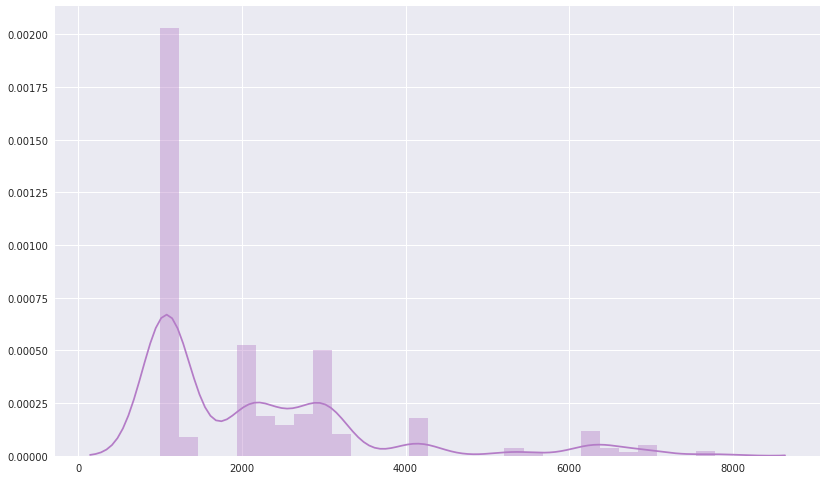

In [83]:
classes = sdfItems.select("class").collect()
sns.distplot(classes, color=p)

In [84]:
sdfItems.select("perishable").distinct().count()

2

In [85]:
sdfItems.select("perishable").distinct().show(5)

+----------+
|perishable|
+----------+
|         1|
|         0|
+----------+



In [86]:
sdfItemsDF= sdfItems.toPandas()

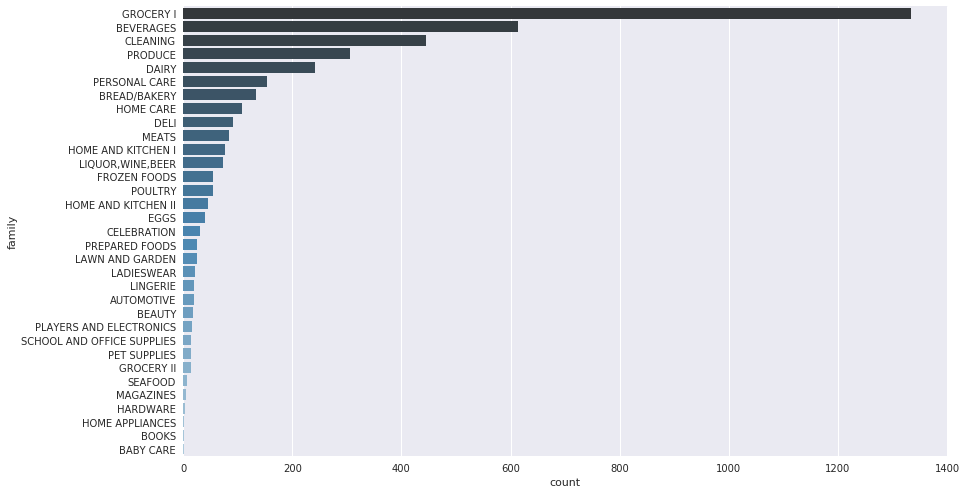

In [87]:
sns.countplot(y="family",data=sdfItemsDF,order = sdfItemsDF['family'].value_counts().index,palette="Blues_d")

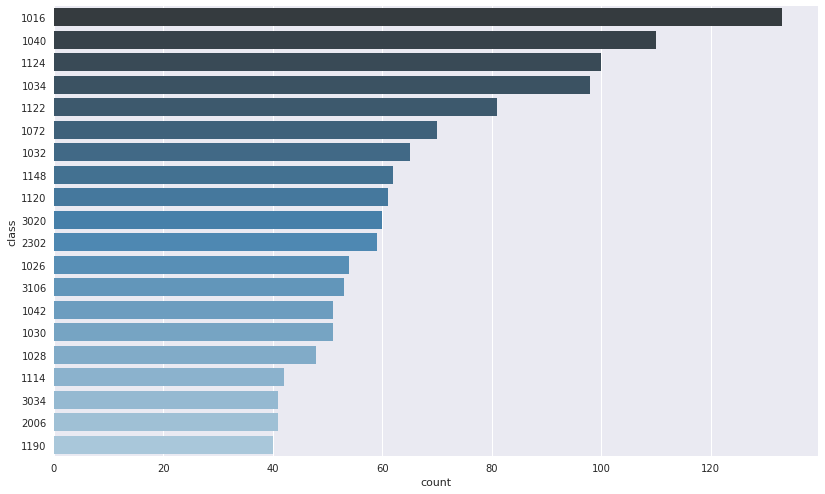

In [88]:
# Top 20 classes
sns.countplot(y="class",data=sdfItemsDF,order = sdfItemsDF['class'].value_counts().iloc[:20].index,palette="Blues_d")

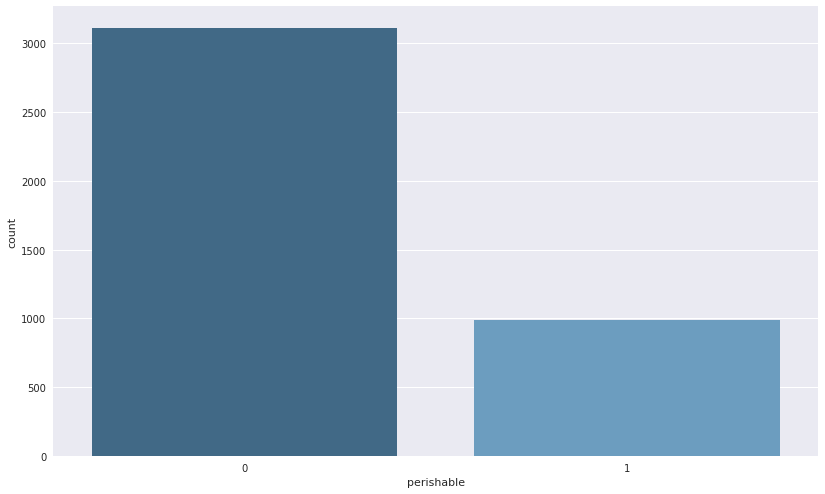

In [89]:
sns.countplot(x="perishable",data=sdfItemsDF,order = sdfItemsDF['perishable'].value_counts().index,palette="Blues_d")

<b>Explore file #5 transactions.csv</b>

In [90]:
sdfTransactions = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/transactions.csv",header = True,inferSchema = True)

In [91]:
sdfTransactions.show(10)

+-------------------+---------+------------+
|               date|store_nbr|transactions|
+-------------------+---------+------------+
|2013-01-01 00:00:00|       25|         770|
|2013-01-02 00:00:00|        1|        2111|
|2013-01-02 00:00:00|        2|        2358|
|2013-01-02 00:00:00|        3|        3487|
|2013-01-02 00:00:00|        4|        1922|
|2013-01-02 00:00:00|        5|        1903|
|2013-01-02 00:00:00|        6|        2143|
|2013-01-02 00:00:00|        7|        1874|
|2013-01-02 00:00:00|        8|        3250|
|2013-01-02 00:00:00|        9|        2940|
+-------------------+---------+------------+
only showing top 10 rows



In [92]:
sdfTransactions.count()

83488

In [93]:
sdfTransactions.select("date", "store_nbr").distinct().count()
# date, store_nbr together form the primary key as distinct count and total row count match

83488

In [94]:
sdfTransactions.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfTransactions.columns]).show()

+----+---------+------------+
|date|store_nbr|transactions|
+----+---------+------------+
|   0|        0|           0|
+----+---------+------------+



In [95]:
sdfTransactions.select("date").distinct().count()

1682

In [96]:
sdfTransactions.select("date").distinct().show(5)

+-------------------+
|               date|
+-------------------+
|2013-10-31 00:00:00|
|2014-08-04 00:00:00|
|2015-04-26 00:00:00|
|2015-07-14 00:00:00|
|2015-10-10 00:00:00|
+-------------------+
only showing top 5 rows



In [97]:
sdfTransactions.select("store_nbr").distinct().count()

54

In [98]:
sdfTransactions.select("store_nbr").distinct().show(5)

+---------+
|store_nbr|
+---------+
|       31|
|       53|
|       34|
|       28|
|       26|
+---------+
only showing top 5 rows



In [99]:
sdfTransactions.select("transactions").distinct().count()

4993

In [100]:
sdfTransactions.select("transactions").distinct().show(5)

+------------+
|transactions|
+------------+
|        1580|
|        1238|
|        4935|
|        1591|
|        2142|
+------------+
only showing top 5 rows



In [101]:
sdfTransactions.approxQuantile("transactions", [0.5], 0.25)
#median

[1070.0]

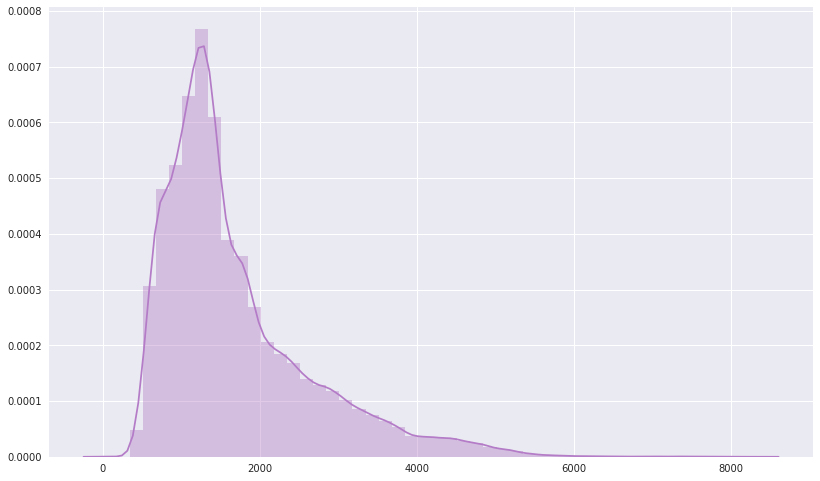

In [102]:
trans = sdfTransactions.select("transactions").collect()
sns.distplot(trans, color=p)

In [103]:
minRow = sdfTransactions.agg({"date": "min"}).collect()[0]
print minRow["min(date)"]

2013-01-01 00:00:00


In [104]:
maxRow = sdfTransactions.agg({"date": "max"}).collect()[0]
print maxRow["max(date)"]

2017-08-15 00:00:00


In [105]:
sdfTransactions.filter(sdfTransactions.store_nbr == 53).show()

+-------------------+---------+------------+
|               date|store_nbr|transactions|
+-------------------+---------+------------+
|2014-05-29 00:00:00|       53|        2545|
|2014-05-30 00:00:00|       53|        1398|
|2014-05-31 00:00:00|       53|        1812|
|2014-06-01 00:00:00|       53|        2221|
|2014-06-02 00:00:00|       53|        1085|
|2014-06-03 00:00:00|       53|         958|
|2014-06-04 00:00:00|       53|        1059|
|2014-06-05 00:00:00|       53|         888|
|2014-06-06 00:00:00|       53|         941|
|2014-06-07 00:00:00|       53|        1336|
|2014-06-08 00:00:00|       53|        1523|
|2014-06-09 00:00:00|       53|         803|
|2014-06-10 00:00:00|       53|         689|
|2014-06-11 00:00:00|       53|         800|
|2014-06-12 00:00:00|       53|         695|
|2014-06-13 00:00:00|       53|         841|
|2014-06-14 00:00:00|       53|        1376|
|2014-06-15 00:00:00|       53|        1288|
|2014-06-16 00:00:00|       53|         796|
|2014-06-1

In [106]:
sdfTransactions.filter(sdfTransactions.store_nbr == 53).count()

1167

In [107]:
sdfTransactions.filter(sdfTransactions.store_nbr == 34).count()

1678

In [108]:
sdfTransactionsDF = sdfTransactions.toPandas()

In [109]:
sdfTransactionsDF['date'] = pd.to_datetime(sdfTransactionsDF['date'])

In [110]:
sdfTransactionsDF.index = sdfTransactionsDF['date']

In [111]:
del sdfTransactionsDF['date']

/usr/local/anaconda/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


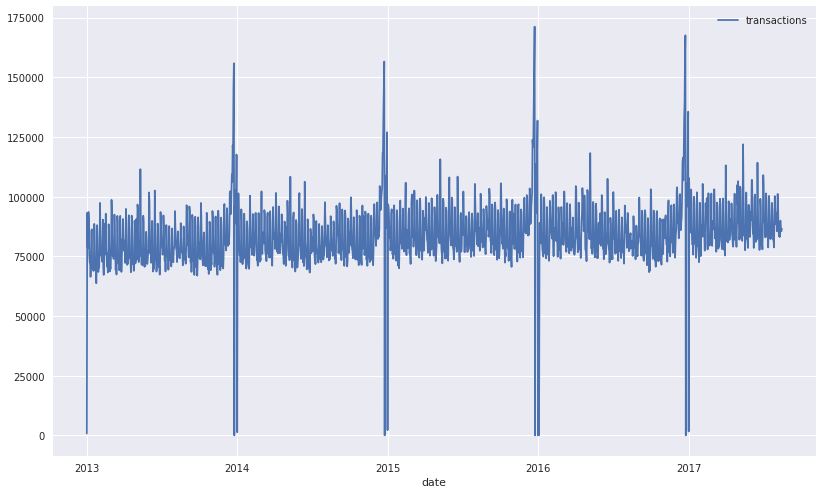

In [112]:
# Daywise transaction count
sdfTransactionsDF.resample('D',how={'transactions':'sum'}).plot()

/usr/local/anaconda/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


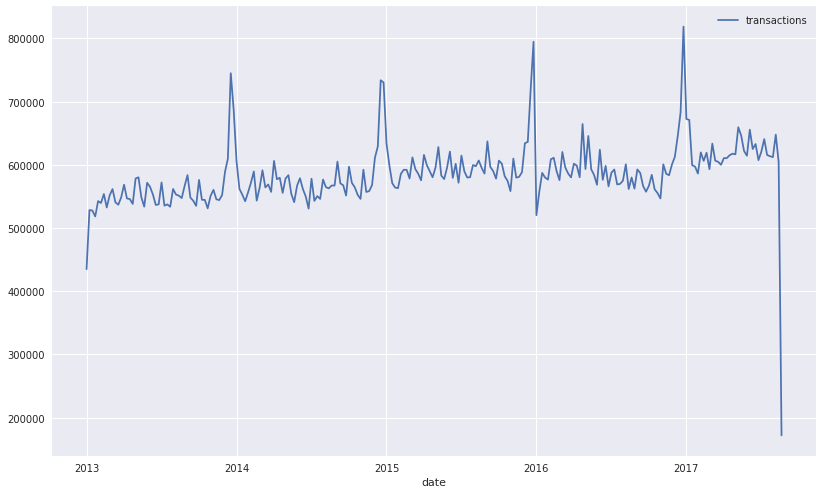

In [113]:
# Weekwise transaction count
sdfTransactionsDF.resample('W',how={'transactions':'sum'}).plot()

In [114]:
Transactions2014 = sdfTransactionsDF['2014'].groupby('store_nbr').resample('Y',how={'transactions':'sum'})

/usr/local/anaconda/python2/lib/python2.7/site-packages/pandas/core/groupby.py:1324: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  return get_resampler_for_grouping(self, rule, *args, **kwargs)


In [115]:
Transactions2015 = sdfTransactionsDF['2015'].groupby('store_nbr').resample('Y',how={'transactions':'sum'})

In [116]:
Transactions2016 = sdfTransactionsDF['2016'].groupby('store_nbr').resample('Y',how={'transactions':'sum'})

In [117]:
Transactions2017 = sdfTransactionsDF['2017'].groupby('store_nbr').resample('Y',how={'transactions':'sum'})

In [118]:
Transactions2013 = sdfTransactionsDF['2013'].groupby('store_nbr').resample('Y',how={'transactions':'sum'})

In [119]:
# Top 10 stores which made huge transactions
Transactions2013.sort_values('transactions',ascending=False).head(10)

,,transactions
store_nbr,date,
44,2013-12-31,1493932
47,2013-12-31,1376187
46,2013-12-31,1304989
45,2013-12-31,1292359
3,2013-12-31,1141431
48,2013-12-31,1089317
8,2013-12-31,1013479
50,2013-12-31,972039
11,2013-12-31,893998


In [120]:
# Top 10 stores which made huge transactions
Transactions2014.sort_values('transactions',ascending=False).head(10)

,,transactions
store_nbr,date,
44,2014-12-31,1622607
47,2014-12-31,1447939
45,2014-12-31,1370575
46,2014-12-31,1344446
48,2014-12-31,1168208
3,2014-12-31,1166136
8,2014-12-31,1029991
50,2014-12-31,973035
49,2014-12-31,949515


In [121]:
# Top 10 stores which made huge transactions
Transactions2015.sort_values('transactions',ascending=False).head(10)

,,transactions
store_nbr,date,
44,2015-12-31,1593523
47,2015-12-31,1430126
45,2015-12-31,1337679
46,2015-12-31,1311670
3,2015-12-31,1175267
48,2015-12-31,1128070
49,2015-12-31,1054872
8,2015-12-31,1002385
50,2015-12-31,953655


In [122]:
# Top 10 stores which made huge transactions
Transactions2016.sort_values('transactions',ascending=False).head(10)

,,transactions
store_nbr,date,
44,2016-12-31,1574685
47,2016-12-31,1402767
45,2016-12-31,1333314
46,2016-12-31,1233791
3,2016-12-31,1164208
49,2016-12-31,1090042
48,2016-12-31,1056809
8,2016-12-31,980025
50,2016-12-31,893879


In [123]:
# Top 10 stores which made huge transactions
Transactions2017.sort_values('transactions',ascending=False).head(10)

,,transactions
store_nbr,date,
44,2017-12-31,988346
47,2017-12-31,878791
45,2017-12-31,867188
46,2017-12-31,795217
3,2017-12-31,719308
49,2017-12-31,696517
48,2017-12-31,665381
8,2017-12-31,612091
50,2017-12-31,591836


<b>Explore  file #6 sample_submission.csv</b>

In [124]:
sdfSampleSubmission = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/sample_submission.csv",header = True,inferSchema = True)

In [125]:
sdfSampleSubmission.show(10)

+---------+----------+
|       id|unit_sales|
+---------+----------+
|125497040|         0|
|125497041|         0|
|125497042|         0|
|125497043|         0|
|125497044|         0|
|125497045|         0|
|125497046|         0|
|125497047|         0|
|125497048|         0|
|125497049|         0|
+---------+----------+
only showing top 10 rows



In [126]:
sdfSampleSubmission.count()

3370464

In [127]:
sdfSampleSubmission.select("id").distinct().count()
# id is the primary key as distinct count and total row count match

3370464

In [128]:
sdfSampleSubmission.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfSampleSubmission.columns]).show()

+---+----------+
| id|unit_sales|
+---+----------+
|  0|         0|
+---+----------+



In [129]:
sdfSampleSubmission.filter(sdfSampleSubmission.unit_sales ==0).count()
#All records contain zero. This column needs to be filled with prediction.

3370464

<b>Explore file #7 test.csv</b>

In [130]:
sdfTest = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/test.csv",header = True,inferSchema = True)

In [131]:
sdfTest.show(10)

+---------+-------------------+---------+--------+-----------+
|       id|               date|store_nbr|item_nbr|onpromotion|
+---------+-------------------+---------+--------+-----------+
|125497040|2017-08-16 00:00:00|        1|   96995|      false|
|125497041|2017-08-16 00:00:00|        1|   99197|      false|
|125497042|2017-08-16 00:00:00|        1|  103501|      false|
|125497043|2017-08-16 00:00:00|        1|  103520|      false|
|125497044|2017-08-16 00:00:00|        1|  103665|      false|
|125497045|2017-08-16 00:00:00|        1|  105574|      false|
|125497046|2017-08-16 00:00:00|        1|  105575|      false|
|125497047|2017-08-16 00:00:00|        1|  105576|      false|
|125497048|2017-08-16 00:00:00|        1|  105577|      false|
|125497049|2017-08-16 00:00:00|        1|  105693|      false|
+---------+-------------------+---------+--------+-----------+
only showing top 10 rows



In [132]:
sdfTest.count()

3370464

In [133]:
sdfTest.select("id").distinct().count()

3370464

In [134]:
sdfTest.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfTest.columns]).show()

+---+----+---------+--------+-----------+
| id|date|store_nbr|item_nbr|onpromotion|
+---+----+---------+--------+-----------+
|  0|   0|        0|       0|          0|
+---+----+---------+--------+-----------+



In [135]:
sdfTest.select("date", "store_nbr", "item_nbr").distinct().count()
#id is an artificial primary key. The unique set of columns are "date", "store_nbr", "item_nbr".

3370464

In [136]:
minRow = sdfTest.agg({"date": "min"}).collect()[0]
print minRow["min(date)"]

2017-08-16 00:00:00


In [137]:
maxRow = sdfTest.agg({"date": "max"}).collect()[0]
print maxRow["max(date)"]

2017-08-31 00:00:00


In [138]:
sdfTest.select("onpromotion").distinct().count()

2

In [139]:
sdfTest.select("onpromotion").distinct().show(5)

+-----------+
|onpromotion|
+-----------+
|       true|
|      false|
+-----------+



In [140]:
print(type(sdfTest))

<class 'pyspark.sql.dataframe.DataFrame'>


In [141]:
sdfTest.printSchema()

root
 |-- id: integer (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- store_nbr: integer (nullable = true)
 |-- item_nbr: integer (nullable = true)
 |-- onpromotion: boolean (nullable = true)



In [142]:
sqlContext.registerDataFrameAsTable(sdfTest, "sdfTesttbl")

In [143]:
df2017 = sqlContext.sql("SELECT store_nbr as store_nbr,date as date,count(item_nbr) as count_item_nbr from sdfTesttbl group by store_nbr,date order by date")

In [144]:
df2017Daywise = sqlContext.sql("SELECT date as date,count(item_nbr) as count_item_nbr from sdfTesttbl group by date order by date")

In [145]:
df2017Storewise = sqlContext.sql("SELECT store_nbr as store_nbr,count(item_nbr) as count_item_nbr from sdfTesttbl group by store_nbr")

In [146]:
df2017Onpromotionwise = sqlContext.sql("SELECT store_nbr as store_nbr,onpromotion as onpromotion, count(item_nbr) as count_item_nbr from sdfTesttbl group by store_nbr,onpromotion")

In [147]:
df2017Onpromotionwise.show(100)

+---------+-----------+--------------+
|store_nbr|onpromotion|count_item_nbr|
+---------+-----------+--------------+
|       17|       true|          3680|
|       30|      false|         59454|
|        1|      false|         59274|
|        6|       true|          3704|
|       48|       true|          4111|
|        3|       true|          3995|
|       18|       true|          4176|
|       54|      false|         59407|
|        7|       true|          3475|
|       25|       true|          2923|
|       42|      false|         59195|
|       41|      false|         59119|
|       29|      false|         58249|
|       11|       true|          4329|
|        9|       true|          4396|
|       36|       true|          5366|
|        6|      false|         58712|
|       23|      false|         59374|
|        4|      false|         59025|
|       15|       true|          3554|
|       41|       true|          3297|
|       26|      false|         59994|
|       12|       true|  

In [148]:
df2017Storewise.show(100)

+---------+--------------+
|store_nbr|count_item_nbr|
+---------+--------------+
|       31|         62416|
|       53|         62416|
|       34|         62416|
|       28|         62416|
|       26|         62416|
|       27|         62416|
|       44|         62416|
|       12|         62416|
|       22|         62416|
|       47|         62416|
|        1|         62416|
|       52|         62416|
|       13|         62416|
|       16|         62416|
|        6|         62416|
|        3|         62416|
|       20|         62416|
|       40|         62416|
|       54|         62416|
|       48|         62416|
|        5|         62416|
|       19|         62416|
|       41|         62416|
|       15|         62416|
|       43|         62416|
|       37|         62416|
|        9|         62416|
|       17|         62416|
|       35|         62416|
|        4|         62416|
|        8|         62416|
|       23|         62416|
|       39|         62416|
|       49|         62416|
|

In [149]:
df2017Daywise.show(20)

+-------------------+--------------+
|               date|count_item_nbr|
+-------------------+--------------+
|2017-08-16 00:00:00|        210654|
|2017-08-17 00:00:00|        210654|
|2017-08-18 00:00:00|        210654|
|2017-08-19 00:00:00|        210654|
|2017-08-20 00:00:00|        210654|
|2017-08-21 00:00:00|        210654|
|2017-08-22 00:00:00|        210654|
|2017-08-23 00:00:00|        210654|
|2017-08-24 00:00:00|        210654|
|2017-08-25 00:00:00|        210654|
|2017-08-26 00:00:00|        210654|
|2017-08-27 00:00:00|        210654|
|2017-08-28 00:00:00|        210654|
|2017-08-29 00:00:00|        210654|
|2017-08-30 00:00:00|        210654|
|2017-08-31 00:00:00|        210654|
+-------------------+--------------+



In [150]:
df2017.show(100)

+---------+-------------------+--------------+
|store_nbr|               date|count_item_nbr|
+---------+-------------------+--------------+
|        3|2017-08-16 00:00:00|          3901|
|       30|2017-08-16 00:00:00|          3901|
|       28|2017-08-16 00:00:00|          3901|
|       37|2017-08-16 00:00:00|          3901|
|       25|2017-08-16 00:00:00|          3901|
|       22|2017-08-16 00:00:00|          3901|
|       41|2017-08-16 00:00:00|          3901|
|       31|2017-08-16 00:00:00|          3901|
|       16|2017-08-16 00:00:00|          3901|
|       35|2017-08-16 00:00:00|          3901|
|       45|2017-08-16 00:00:00|          3901|
|       29|2017-08-16 00:00:00|          3901|
|       14|2017-08-16 00:00:00|          3901|
|       38|2017-08-16 00:00:00|          3901|
|       27|2017-08-16 00:00:00|          3901|
|       17|2017-08-16 00:00:00|          3901|
|       50|2017-08-16 00:00:00|          3901|
|        9|2017-08-16 00:00:00|          3901|
|       32|20

In [151]:
#sdfTest.columns
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [152]:
data = [go.Bar(
            x=df2017Daywise.toPandas()['date'],
            y=df2017Daywise.toPandas()["count_item_nbr"],
            orientation = 'h'
)]

iplot(data)

In [153]:
df2017OnpromotionwiseTrue = df2017Onpromotionwise[df2017Onpromotionwise.onpromotion=='true']
df2017OnpromotionwiseFalse = df2017Onpromotionwise[df2017Onpromotionwise.onpromotion=='false']
fig = {
    'data': [
  		{
  			'x': df2017OnpromotionwiseTrue.toPandas()['store_nbr'], 
        	'y': df2017OnpromotionwiseTrue.toPandas()['count_item_nbr'],  
        	'mode': 'markers' 
        	},
        {
        	'x': df2017OnpromotionwiseTrue.toPandas()['store_nbr'], 
        	'y': df2017OnpromotionwiseTrue.toPandas()['count_item_nbr'],  
        	'mode': 'markers'   
        	}
    ],
    'layout': {
        'xaxis': {'title': 'Store Nbr'},
        'yaxis': {'title': "Number of Items"}
    }
}

iplot(fig)

<b>Explore file #8 train.csv </b>

In [154]:
sdfTrain = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/train/train.csv",header = True,inferSchema = True)

In [155]:
sdfTrain.show(10)

+---+-------------------+---------+--------+----------+-----------+
| id|               date|store_nbr|item_nbr|unit_sales|onpromotion|
+---+-------------------+---------+--------+----------+-----------+
|  0|2013-01-01 00:00:00|       25|  103665|       7.0|       null|
|  1|2013-01-01 00:00:00|       25|  105574|       1.0|       null|
|  2|2013-01-01 00:00:00|       25|  105575|       2.0|       null|
|  3|2013-01-01 00:00:00|       25|  108079|       1.0|       null|
|  4|2013-01-01 00:00:00|       25|  108701|       1.0|       null|
|  5|2013-01-01 00:00:00|       25|  108786|       3.0|       null|
|  6|2013-01-01 00:00:00|       25|  108797|       1.0|       null|
|  7|2013-01-01 00:00:00|       25|  108952|       1.0|       null|
|  8|2013-01-01 00:00:00|       25|  111397|      13.0|       null|
|  9|2013-01-01 00:00:00|       25|  114790|       3.0|       null|
+---+-------------------+---------+--------+----------+-----------+
only showing top 10 rows



In [156]:
sdfTrain.count()

125497040

In [157]:
sdfTrain.select("id").distinct().count()
# id is the primary key as distinct count and total row count match

125497040

In [158]:
sdfTrain.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfTrain.columns]).show()

+---+----+---------+--------+----------+-----------+
| id|date|store_nbr|item_nbr|unit_sales|onpromotion|
+---+----+---------+--------+----------+-----------+
|  0|   0|        0|       0|         0|   21657651|
+---+----+---------+--------+----------+-----------+



In [159]:
sdfTrain.approxQuantile("unit_sales", [0.5], 0.25)
#median

[6.0]

In [160]:
minRowTrain = sdfTrain.agg({"date": "min"}).collect()[0]
print minRowTrain["min(date)"]

2013-01-01 00:00:00


In [161]:
maxRowTrain = sdfTrain.agg({"date": "max"}).collect()[0]
print maxRowTrain["max(date)"]

2017-08-15 00:00:00


In [162]:
sdfTrain.select("onpromotion").distinct().count()

3

In [163]:
sdfTrain.select("onpromotion").distinct().show(10)

+-----------+
|onpromotion|
+-----------+
|       null|
|       true|
|      false|
+-----------+



In [164]:
sdfTrain.describe().show()

+-------+-------------------+------------------+------------------+------------------+
|summary|                 id|         store_nbr|          item_nbr|        unit_sales|
+-------+-------------------+------------------+------------------+------------------+
|  count|          125497040|         125497040|         125497040|         125497040|
|   mean|       6.27485195E7|27.464578025107205|  972769.152722598|  8.55486526843821|
| stddev|3.622787505758819E7| 16.33051030272046|520533.59861074144|23.605151809802148|
|    min|                  0|                 1|             96995|          -15372.0|
|    max|          125497039|                54|           2127114|           89440.0|
+-------+-------------------+------------------+------------------+------------------+



In [165]:
print(type(sdfTrain))

<class 'pyspark.sql.dataframe.DataFrame'>


In [166]:
#unit_sales = sdfTrain.select("unit_sales").collect()
#sns.distplot(unit_sales, color=p)

#Could not get this to work. Got the below error:
#Py4JJavaError: An error occurred while calling o76.collectToPython.
#org.apache.spark.SparkException: Job 12 cancelled because SparkContext was shut down

In [167]:
sqlContext.registerDataFrameAsTable(sdfTrain, "sdfTraintbl")

In [168]:
sdfTrainTbl2014 = sqlContext.sql("SELECT store_nbr as store_nbr,year(date) as date,count(item_nbr) as count_item_nbr,(sum(unit_sales)*count(item_nbr)) as total_sales from sdfTraintbl where year(date) ='2014' group by store_nbr,year(date)")

In [169]:
sdfTrainTbl2015 = sqlContext.sql("SELECT store_nbr as store_nbr,year(date) as date,count(item_nbr) as count_item_nbr,(sum(unit_sales)*count(item_nbr)) as total_sales from sdfTraintbl where year(date) ='2015' group by store_nbr,year(date)")

In [170]:
sdfTrainTbl2016 = sqlContext.sql("SELECT store_nbr as store_nbr,year(date) as date,count(item_nbr) as count_item_nbr,(sum(unit_sales)*count(item_nbr)) as total_sales from sdfTraintbl where year(date) ='2016' group by store_nbr,year(date)")

In [171]:
sdfTrainTbl2017 = sqlContext.sql("SELECT store_nbr as store_nbr,year(date) as date,count(item_nbr) as count_item_nbr,(sum(unit_sales)*count(item_nbr)) as total_sales from sdfTraintbl where year(date) ='2017' group by store_nbr,year(date)")

In [172]:
sdfTrainTbl2013 = sqlContext.sql("SELECT store_nbr as store_nbr,year(date) as date,count(item_nbr) as count_item_nbr,(sum(unit_sales)*count(item_nbr)) as total_sales from sdfTraintbl where year(date) ='2013' group by store_nbr,year(date)")

In [173]:
sdfTrainTbl2013.show(10)

+---------+----+--------------+--------------------+
|store_nbr|date|count_item_nbr|         total_sales|
+---------+----+--------------+--------------------+
|       17|2013|        293454|6.850260331408616E11|
|       27|2013|        361609|8.743415038239781E11|
|       40|2013|        274548|5.449007075126999...|
|       12|2013|        268012| 4.62792876305276E11|
|       15|2013|        273017|4.872371254961475E11|
|        8|2013|        454300|1.816183909894198...|
|       13|2013|        250857|4.089483675438390...|
|       51|2013|        422731|1.997916874945029...|
|       38|2013|        389963|1.073552181714039...|
|        6|2013|        435893|1.545849896466980...|
+---------+----+--------------+--------------------+
only showing top 10 rows



In [ ]:
sdfTrainTbl2014.show(10)

In [ ]:
sdfTrainTbl2015.show(10)

In [ ]:
sdfTrainTbl2016.show(10)

In [ ]:
sdfTrainTbl2017.show(10)

In [ ]:
# In -progress....Didn't execute it yet
data = [go.Histogram(x=sdfTrainTbl2013.toPandas()['total_sales'])]
iplot(data)

In [ ]:
# In -progress....Didn't execute it yet
data = [go.Histogram(x=sdfTrainTbl2014.toPandas()['total_sales'])]
iplot(data)

In [ ]:
# In -progress....Didn't execute it yet
data = [go.Histogram(x=sdfTrainTbl2015.toPandas()['total_sales'])]
iplot(data)

In [ ]:
# In -progress....Didn't execute it yet
data = [go.Histogram(x=sdfTrainTbl2016.toPandas()['total_sales'])]
iplot(data)

In [ ]:
# In -progress....Didn't execute it yet
data = [go.Histogram(x=sdfTrainTbl2017.toPandas()['total_sales'])]
iplot(data)

In [ ]:
# In -progress....Didn't execute it yet
data = [go.Histogram(x=sdfTrain.toPandas()['item_nbr'])]
iplot(data)

<b>Check relatioship between test and sample_submission </b>

In [ ]:
print(sdfTest.show(10))

In [ ]:
sdfSampleSubmission.createOrReplaceTempView("vwSampleSubmission")

In [ ]:
sparkSession.sql('select * from vwSampleSubmission where id in (125497040, 125497041, 125497042, 125497043, 125497044, 125497045, 125497046, 125497047, 125497048, 125497049)').show()

In [ ]:
sdfTest.createOrReplaceTempView("vwTest")

In [ ]:
sparkSession.sql('select count(*) from vwSampleSubmission, vwTest where vwSampleSubmission.id = vwTest.id').show()

<b>Check relatioship between test and stores, items </b>

In [ ]:
sdfStores.createOrReplaceTempView("vwStores")

In [ ]:
sdfItems.createOrReplaceTempView("vwItems")

In [ ]:
sparkSession.sql('select count(distinct vwTest.item_nbr)  from vwItems, vwTest where vwItems.item_nbr = vwTest.item_nbr').show()

In [ ]:
sparkSession.sql('select count(distinct vwTest.store_nbr)  from vwStores, vwTest where vwStores.store_nbr = vwTest.store_nbr').show()

<b>Check relatioship between train and stores, items </b>

In [ ]:
sdfStores.createOrReplaceTempView("vwStores")

In [ ]:
sdfItems.createOrReplaceTempView("vwItems")

In [ ]:
sdfTrain.createOrReplaceTempView("vwTrain")

In [ ]:
sparkSession.sql('select count(distinct vwTrain.item_nbr)  from vwItems, vwTrain where vwItems.item_nbr = vwTrain.item_nbr').show()

In [ ]:
sparkSession.sql('select count(distinct vwTrain.store_nbr)  from vwStores, vwTrain where vwStores.store_nbr = vwTrain.store_nbr').show()